In [85]:
import analysis
import scipy.io
from nilearn import plotting as nlp
import nibabel as nb
import numpy as np

In [ ]:
mat = scipy.io.loadmat('../sourcedata/data/parcellations/Ind_parcellation_MSHBM_sub1_w30_MRF30_beta50_TEST.mat')

In [5]:
lh_labels=mat['lh_labels']
rh_labels=mat['rh_labels']

In [39]:
lh_labels

array([[  4],
       [153],
       [166],
       ...,
       [ 63],
       [ 63],
       [ 63]], dtype=uint8)

In [7]:
rh_labels.shape

(32492, 1)

In [48]:
fslr_L_file='/om/scratch/Thu/jsmentch/datasets.datalad.org/templateflow/tpl-fsLR/tpl-fsLR_hemi-L_den-32k_desc-vaavg_midthickness.shape.gii'
fslr_L=nb.load('/om/scratch/Thu/jsmentch/datasets.datalad.org/templateflow/tpl-fsLR/tpl-fsLR_hemi-L_den-32k_desc-vaavg_midthickness.shape.gii')

In [43]:
fslr_L.labeltable.

TypeError: 'GiftiLabelTable' object is not callable

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:214: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


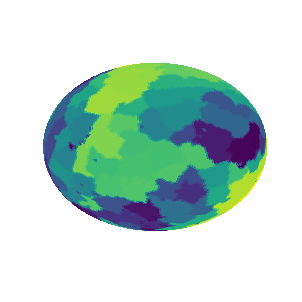

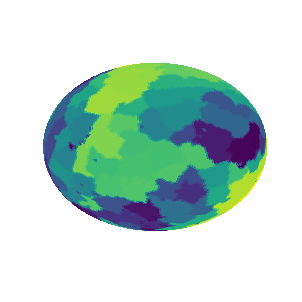

In [50]:
nlp.plot_surf('/om/scratch/Thu/jsmentch/datasets.datalad.org/templateflow/tpl-fsLR/tpl-fsLR_space-fsaverage_hemi-L_den-32k_sphere.surf.gii', surf_map=lh_labels)

In [30]:
fslr_L.add_gifti_data_array(lh_labels)

TypeError: Not a valid GiftiDataArray instance

In [24]:
add_gifti_data_array(dataarr)

In [12]:
nlp.plot_surf(lh_labels)

ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as .orig, .pial, .sphere, .white, .inflated or two Numpy arrays organized in a list, tuple or a namedtuple with the fields "coordinates" and "faces"

In [28]:
import hcp_utils as hcp
score_cortex_dataL = hcp.left_cortex_data

In [77]:
score_cortex_dataL = hcp.left_cortex_data(lh_labels[:,0],fill=0)

In [79]:
score_cortex_dataL.shape

(32492,)

In [98]:
from nilearn_plotting_custom import plot_surf
import matplotlib.pyplot as plt
v=[0,400]
threshold=None
symmetric_cmap=False

import matplotlib.colors as mcolors

colors1 = plt.cm.hsv(np.linspace(0., 1, 128))
#colors2 = plt.cm.hsv(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap=mymap

#cmap='hsv'
scratch_dir = '../tmp'
title='kong_parcellation_test'
subject='1'
feature='parcellation'
score_type='none'
from PIL import Image
from PIL import ImageDraw
# def plot_results(scores,score_type,data_type,vertex_info,subject,feature,dataset,title):
#     '''Inputs:
#         scores = data to plot
#         score_type = r2, r, p, z, d, raw
#         data_type = 32k (3T) or 59k (7T)
#         vertex info = None or the vertex info if it is 59k data beacuse hcp_utils doesnt by default
#         subject = eg 100610 subject id for file naming
#         feature = eg as_scores plotted feature for file naming
#         dataset = eg merlin or HCP_7T which dataset?
#         title = 
#     '''
#     scratch_dir = '../tmp'
# #     scratch_dir = '/scratch/scratch/Fri/jsmentch/tmp'
# #     if not os.path.exists(scratch_dir):
# #         os.mkdir(scratch_dir)
#     if score_type == 'r2':
#         v=[0,0.5]
#         threshold=None
#         symmetric_cmap=False
#         cmap='inferno'
#     if score_type == 'r':
#         v=[0,1]
#         threshold=None
#         symmetric_cmap=False
#         cmap='inferno'
#     if score_type == 'p':
#         v=[0,0.05]
#         symmetric_cmap=False
#         cmap='inferno'
#     if score_type == 'z':
#         v=[-10,10]
#         threshold=3
#         symmetric_cmap=True
#         cmap='cold_hot'
#     if score_type == 'd':
#         v=[0,10]
#         threshold=3
#         symmetric_cmap=True
#         cmap='inferno'
#     if score_type == 'raw':
#         v=[-10,10]
#         threshold=1
#         symmetric_cmap=True
#         cmap='cold_hot'
#     save_dir=f'../outputs/figures/{dataset}/'

score_cortex_dataL = lh_labels #hcp.left_cortex_data(scores, fill=0)
score_cortex_dataR = rh_labels #hcp.right_cortex_data(scores, fill=0)
#     # sulcal depth paths
#     sulc_left = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/MNINonLinear/fsaverage_LR59k/100610.L.sulc.59k_fs_LR.shape.gii'
#     sulc_right = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/MNINonLinear/fsaverage_LR59k/100610.R.sulc.59k_fs_LR.shape.gii'
#     # params for view to plot
params = [('flat_L',score_cortex_dataL,hcp.mesh.flat_left,hcp.mesh.sulc_left,'left'),\
 ('flat_R',score_cortex_dataR,hcp.mesh.flat_right,hcp.mesh.sulc_right,'right'),\
 ('vinf_L',score_cortex_dataL,hcp.mesh.very_inflated_left,hcp.mesh.sulc_left,'left'),\
 ('vinf_R',score_cortex_dataR,hcp.mesh.very_inflated_right,hcp.mesh.sulc_right,'right'),\
]
# plot each hemi and mesh, save to outputs dir
for name, data, mesh, sulc, hemi in params:
    #figure, axes = plt.subplots(subplot_kw=dict(projection="3d"), figsize=(6,4))
    plot_surf(mesh,\
            data, \
              cmap=cmap,symmetric_cmap=symmetric_cmap, avg_method='median',#figure=fig,\
            bg_map=sulc, colorbar=True, vmin=v[0], vmax=v[1], threshold=threshold, hemi=hemi, \
            data_alpha=np.where(data>0,1,0),\
#                data_alpha=np.ones(data.shape),\
              data_remove=np.zeros(data.shape),output_file=f'{scratch_dir}/{name}.png')
#combine saved maps into one with PIL
#     if notebook==True:
area = (75, 140, 635, 560) #area to crop from each image
#     else:
#         area = (105, 190, 880, 780)

img = Image.open(f'{scratch_dir}/flat_L.png',mode='r')
img = img.resize((770,720))
cropped = img.crop(area)
fL=cropped.transpose(Image.FLIP_LEFT_RIGHT)
w,h = img.size
c_area = (690, 0, w-10, h) # area of colorbar to crop
cbar = img.crop(c_area)

img = Image.open(f'{scratch_dir}/flat_R.png',mode='r')
img = img.resize((770,720))
fR = img.crop(area)

img = Image.open(f'{scratch_dir}/vinf_L.png',mode='r')
img = img.resize((770,720))
iL = img.crop(area)
#iL=cropped.transpose(Image.FLIP_LEFT_RIGHT)

img = Image.open(f'{scratch_dir}/vinf_R.png',mode='r')
img = img.resize((770,720))
iR = img.crop(area)

w,h=iR.size

new_im = Image.new('RGB', ( (w*2)+70 , h*2) ,(255, 255, 255, 1))
new_im.paste(fL,(0,h))
new_im.paste(fR,(w,h))
new_im.paste(iL,(0,0))
new_im.paste(iR,(w,0))
new_im.paste(cbar,(w*2,int(round(h/4))))

w,h=new_im.size

draw = ImageDraw.Draw(new_im)
draw.text((0,0),f"{title}_{subject}_{feature}_{score_type}",(0,0,0))
save_dir=f'../outputs/figures/parcellation/'

new_im.save(f'{save_dir}{title}_{subject}_{feature}_{score_type}.png')

#     os.remove(f'{scratch_dir}/flat_L.png')
#     os.remove(f'{scratch_dir}/flat_R.png')
#     os.remove(f'{scratch_dir}/vinf_L.png')
#     os.remove(f'{scratch_dir}/vinf_R.png')

[0.     0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225
 0.025  0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475
 0.05   0.0525 0.055  0.0575 0.06   0.0625 0.065  0.0675 0.07   0.0725
 0.075  0.0775 0.08   0.0825 0.085  0.0875 0.09   0.0925 0.095  0.0975
 0.1    0.1025 0.105  0.1075 0.11   0.1125 0.115  0.1175 0.12   0.1225
 0.125  0.1275 0.13   0.1325 0.135  0.1375 0.14   0.1425 0.145  0.1475
 0.15   0.1525 0.155  0.1575 0.16   0.1625 0.165  0.1675 0.17   0.1725
 0.175  0.1775 0.18   0.1825 0.185  0.1875 0.19   0.1925 0.195  0.1975
 0.2    0.2025 0.205  0.2075 0.21   0.2125 0.215  0.2175 0.22   0.2225
 0.225  0.2275 0.23   0.2325 0.235  0.2375 0.24   0.2425 0.245  0.2475
 0.25   0.2525 0.255  0.2575 0.26   0.2625 0.265  0.2675 0.27   0.2725
 0.275  0.2775 0.28   0.2825 0.285  0.2875 0.29   0.2925 0.295  0.2975
 0.3    0.3025 0.305  0.3075 0.31   0.3125 0.315  0.3175 0.32   0.3225
 0.325  0.3275 0.33   0.3325 0.335  0.3375 0.34   0.3425 0.345  0.3475
 0.35 